# Part 1: cleaning the data

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
%matplotlib inline 
plt.style.use('ggplot') 
import warnings
warnings.filterwarnings("ignore")

In [22]:
columns = ['user_id','order_dt','order_products','order_amount']
df = pd.read_table("CDNOW_master.txt",names = columns,sep = '\s+')

In [23]:
df.head()

,user_id,order_dt,order_products,order_amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         69659 non-null  int64  
 1   order_dt        69659 non-null  int64  
 2   order_products  69659 non-null  int64  
 3   order_amount    69659 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


In [25]:
df.describe()

,user_id,order_dt,order_products,order_amount
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


- The mean of product's order is 2 and amount of order is 3. - The median is 2 products and the 75th quantile is 3.
- It indicated that most of the orders did not account for big amount of consumption.

In [27]:
df.dtypes

user_id             int64
order_dt            int64
order_products      int64
order_amount      float64
dtype: object

In [29]:
df.isna().sum()

user_id           0
order_dt          0
order_products    0
order_amount      0
dtype: int64

In [30]:
df['order_dt'] = pd.to_datetime(df.order_dt,format = '%Y%m%d') 
df['month'] = df.order_dt.values.astype('datetime64[M]')  

In [31]:
df

,user_id,order_dt,order_products,order_amount,month
0,1,1997-01-01,1,11.77,1997-01-01
1,2,1997-01-12,1,12.00,1997-01-01
2,2,1997-01-12,5,77.00,1997-01-01
3,3,1997-01-02,2,20.76,1997-01-01
4,3,1997-03-30,2,20.76,1997-03-01
...,...,...,...,...,...
69654,23568,1997-04-05,4,83.74,1997-04-01
69655,23568,1997-04-22,1,14.99,1997-04-01
69656,23569,1997-03-25,2,25.74,1997-03-01
69657,23570,1997-03-25,3,51.12,1997-03-01


# Part 2: Analysis data monthly
- Total monthly consumption
- Monthly times of consumption 
- Monthly number of order 
- Monthly number of customers

In [32]:
# 1.Total monthly consumption
grouped_month=df.groupby('month')

In [33]:
order_month_amount=grouped_month.order_amount.sum()

In [34]:
order_month_amount.head()

month
1997-01-01    299060.17
1997-02-01    379590.03
1997-03-01    393155.27
1997-04-01    142824.49
1997-05-01    107933.30
Name: order_amount, dtype: float64

<AxesSubplot:xlabel='month'>

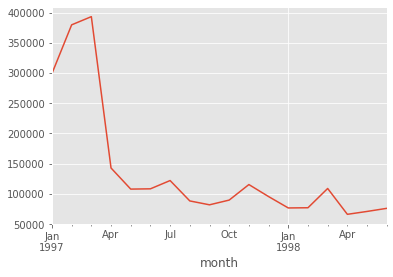

In [35]:
order_month_amount.plot()

In [36]:
# 2.Monthly times of consumption 
#The number of consumer orders in the first three months is about 10000 and it decreased to 2000.

In [37]:
grouped_month.user_id.count()

month
1997-01-01     8928
1997-02-01    11272
1997-03-01    11598
1997-04-01     3781
1997-05-01     2895
1997-06-01     3054
1997-07-01     2942
1997-08-01     2320
1997-09-01     2296
1997-10-01     2562
1997-11-01     2750
1997-12-01     2504
1998-01-01     2032
1998-02-01     2026
1998-03-01     2793
1998-04-01     1878
1998-05-01     1985
1998-06-01     2043
Name: user_id, dtype: int64

<AxesSubplot:xlabel='month'>

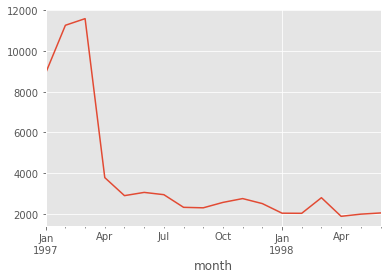

In [38]:
grouped_month.user_id.count().plot()

In [39]:
# 3.Monthly number of order 
# The number of order of the first three month was about 10000, however, it decreased largely

In [40]:
grouped_month.order_amount.count()

month
1997-01-01     8928
1997-02-01    11272
1997-03-01    11598
1997-04-01     3781
1997-05-01     2895
1997-06-01     3054
1997-07-01     2942
1997-08-01     2320
1997-09-01     2296
1997-10-01     2562
1997-11-01     2750
1997-12-01     2504
1998-01-01     2032
1998-02-01     2026
1998-03-01     2793
1998-04-01     1878
1998-05-01     1985
1998-06-01     2043
Name: order_amount, dtype: int64

<AxesSubplot:xlabel='month'>

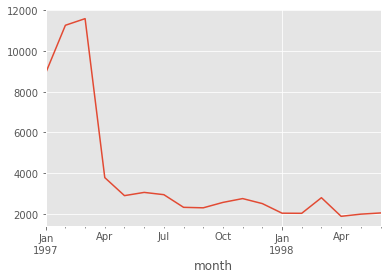

In [41]:
grouped_month.order_amount.count().plot()

In [42]:
# 4. Monthly number of customers
# The number of consumers in the first three months is between 8000-10000 and then it decresed to 2000

In [43]:
df.groupby('month').user_id.nunique()

month
1997-01-01    7846
1997-02-01    9633
1997-03-01    9524
1997-04-01    2822
1997-05-01    2214
1997-06-01    2339
1997-07-01    2180
1997-08-01    1772
1997-09-01    1739
1997-10-01    1839
1997-11-01    2028
1997-12-01    1864
1998-01-01    1537
1998-02-01    1551
1998-03-01    2060
1998-04-01    1437
1998-05-01    1488
1998-06-01    1506
Name: user_id, dtype: int64

<AxesSubplot:xlabel='month'>

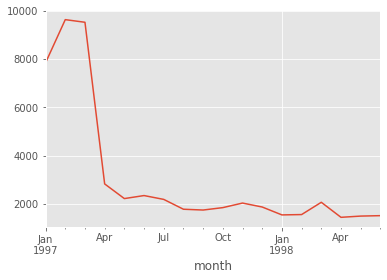

In [44]:
df.groupby('month').user_id.nunique().plot()

# summary: 
1.It showes a trend of large purchases in the early stage and a decline in the later stages
2.The amount of sales  from January to March was very high and i guess that sales promotion activities have been carried out and the spring festivals and valentine's days contributed to it.
3.After the end of the event and beginning in April, sales tended to stabilize.

# Part 3 Consumption analysis
- Descriptive statistics of consumption 
- Scatter plot of amount of consumption and number of consumption
- Distribution diagram of amount of consumption
- Distribution diagram of number of consumption
- Percentage of users' cumulative consumption

In [45]:
# 1.Descriptive statistics of consumption

In [46]:
group_user = df.groupby('user_id')

In [47]:
group_user.sum().describe()

,order_products,order_amount
count,23570.000000,23570.000000
mean,7.122656,106.080426
std,16.983531,240.925195
min,1.000000,0.000000
25%,1.000000,19.970000
50%,3.000000,43.395000
75%,7.000000,106.475000
max,1033.000000,13990.930000


<AxesSubplot:xlabel='order_amount', ylabel='order_products'>

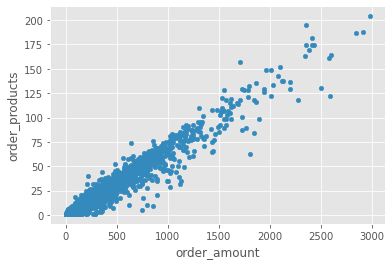

In [48]:
# 2. Scatter plot ( the amount of consumption and number of product's purchase)
group_user.sum().query('order_amount < 3000').plot.scatter(x = 'order_amount' , y = 'order_products')
# The function of query is to filter('order_amount < 3000')

There are few outliers.The relationship between amount of products and number of consumption is positive and linear relationship.

<AxesSubplot:ylabel='Frequency'>

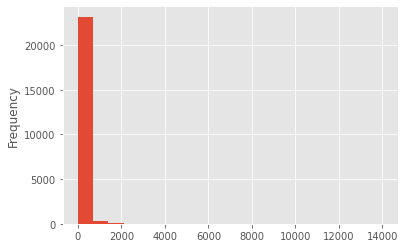

In [49]:
# 3.Histogram of amount of consumption 
group_user.sum().order_amount. plot.hist(bins = 20)
# The most of customers contributed to small amount of consumption and few customers contributed to high consumption.

The distribution of amount of consumption was concentrated between 0 and 1000. The ability of consumption for most of customers was lower.

<AxesSubplot:>

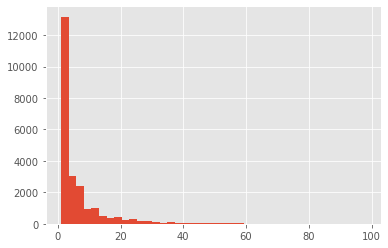

In [50]:
# 4. Histogram of number of consumption
group_user.sum().query('order_products < 100').order_products.hist(bins = 40)

Most of customers bought less than 20 products.

In [51]:
# 5. Percentage of user's consumption
# what percentage of each customer's consumption in total consumption 
# compute the cumulative sum of array elements
# sort_value is sort by ascending

In [52]:
user_cumsum = group_user.sum().sort_values('order_amount')
user_cumsum
# There were some zero of amount due to promotions in the first three month.

,order_products,order_amount
user_id,,
10175,1,0.00
4559,1,0.00
1948,1,0.00
925,1,0.00
10798,1,0.00
...,...,...
7931,514,6497.18
19339,378,6552.70
7983,536,6973.07


In [53]:
user_cumsum = group_user.sum().sort_values('order_amount').cumsum()
user_cumsum
# why cumsum? - compute the cumulative sum of array elements

,order_products,order_amount
user_id,,
10175,1,0.00
4559,2,0.00
1948,3,0.00
925,4,0.00
10798,5,0.00
...,...,...
7931,165017,2463822.60
19339,165395,2470375.30
7983,165931,2477348.37


In [54]:
user_cumsum = group_user.sum().sort_values('order_amount').apply(lambda x: x.cumsum() / x.sum())
user_cumsum
# we can see the percentage of user's consumption (divide 2.5 million) 

,order_products,order_amount
user_id,,
10175,0.000006,0.000000
4559,0.000012,0.000000
1948,0.000018,0.000000
925,0.000024,0.000000
10798,0.000030,0.000000
...,...,...
7931,0.982940,0.985405
19339,0.985192,0.988025
7983,0.988385,0.990814


In [55]:
user_cumsum = group_user.sum().sort_values('order_amount').apply(lambda x: x.cumsum() / x.sum())
user_cumsum.reset_index()

,user_id,order_products,order_amount
0,10175,0.000006,0.000000
1,4559,0.000012,0.000000
2,1948,0.000018,0.000000
3,925,0.000024,0.000000
4,10798,0.000030,0.000000
...,...,...,...
23565,7931,0.982940,0.985405
23566,19339,0.985192,0.988025
23567,7983,0.988385,0.990814
23568,14048,0.994538,0.994404


<AxesSubplot:>

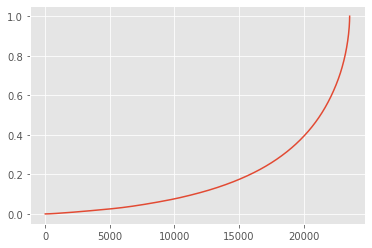

In [56]:
# plot for proportion of amount of consumption
user_cumsum = group_user.sum().sort_values('order_amount').apply(lambda x: x.cumsum() / x.sum())
user_cumsum.reset_index().order_amount.plot()
# sort_value is sort by ascending

Summary:
1.Twenty thousand customers accounted for only 40% total consumption and the rest of 5000 customers accounted for 60% consumption.
2. About 50% customers (12500 twelve thousand customers) only contributed 15% of the sales and the top 5000 customers contributed 60% of the consumption.
3. If we keep top 5000 customers, we can achieve KPI.
4. Top 5000 customers need to be maintained and managed  and as well as the new customers should be retained and converted.
5. It conforms to Pareto principle illustrating 80-20 rule that 80% of outcomes (outputs) come from 20% of causes (inputs).
6. The loss of customers was increasing and the company needs to attract new customers and retain the top old customers in order to increase sales and revenue.

# Part 4 Customer behavior analysis
- The first consumption
- The last consumption
- The comparation of old customers and new customers
- RFM segmentation 

<AxesSubplot:>

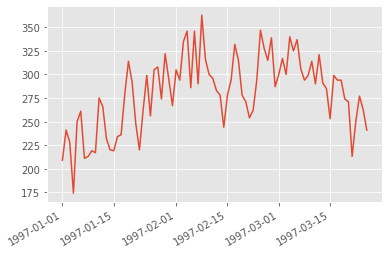

In [57]:
# 1. The first consumption
group_user.min().order_dt.value_counts().plot()
# Most of customers' consumption were in the first three months.

In [58]:
# 2. The last consumption
group_user.month.max().value_counts()

1997-02-01    4912
1997-03-01    4478
1997-01-01    4192
1998-06-01    1506
1998-05-01    1042
1998-03-01     993
1998-04-01     769
1997-04-01     677
1997-12-01     620
1997-11-01     609
1998-02-01     550
1998-01-01     514
1997-06-01     499
1997-07-01     493
1997-05-01     480
1997-10-01     455
1997-09-01     397
1997-08-01     384
Name: month, dtype: int64

<AxesSubplot:>

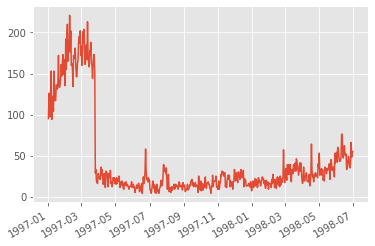

In [59]:
group_user.max().order_dt.value_counts().plot()

Summary:
1.The last purchase was more widely distributed than the first purchase.
2.Most of last purchases were in the first three months, indicating that many customers did not purchase after first purchase.
3.The churn was increasing and user loyalty and user stickiness were decreasing.

In [60]:
# 3. compare the new and the old customers
user_life = group_user.order_dt.agg(['min','max'])
user_life.head()

,min,max
user_id,,
1,1997-01-01,1997-01-01
2,1997-01-12,1997-01-12
3,1997-01-02,1998-05-28
4,1997-01-01,1997-12-12
5,1997-01-01,1998-01-03


In [61]:
(user_life["min"] == user_life["max"]).value_counts()

True     12054
False    11516
dtype: int64

Summary:

1.It shows that there were 12054 new customers and 11516 old customers. 
2.Half of customers were new users and half of customers were old users.
3.Most of customers did not purchaser after the first consumption. The customer stickiness  was weak.

4.RFM segmentation(Recency, Frequency, Monetary)
- why?? Identify best customers of a company by analyzing spending habits.
- Recency: How recently a customer has made a purchase
- Frequency: How often a customer makes a purchase or number of consumptions
- Monetary: How much money a customer spends on purchases

In [62]:
rfm = df.pivot_table(index = 'user_id',
                    values = ['order_products','order_amount','order_dt'],
                    aggfunc = {'order_amount':sum,'order_dt':max,'order_products':sum})

rfm.head()
# order_products is total number consumption as frequency

,order_amount,order_dt,order_products
user_id,,,
1,11.77,1997-01-01,1
2,89.00,1997-01-12,6
3,156.46,1998-05-28,16
4,100.50,1997-12-12,7
5,385.61,1998-01-03,29


In [63]:
rfm['R'] =(rfm.order_dt.max()-rfm.order_dt) / np.timedelta64(1,'D')
rfm
# order_dt.max()- reduce the end of june in 1998
# numpy.'timedelta64[D]'
# R- the number of days consumption
# F- the number of products of purchase

,order_amount,order_dt,order_products,R
user_id,,,,
1,11.77,1997-01-01,1,545.0
2,89.00,1997-01-12,6,534.0
3,156.46,1998-05-28,16,33.0
4,100.50,1997-12-12,7,200.0
5,385.61,1998-01-03,29,178.0
...,...,...,...,...
23566,36.00,1997-03-25,2,462.0
23567,20.97,1997-03-25,1,462.0
23568,121.70,1997-04-22,6,434.0


In [64]:
rfm.rename(columns ={'order_products':'F', 'order_amount':'M'},inplace = True )
rfm.head()

,M,order_dt,F,R
user_id,,,,
1,11.77,1997-01-01,1,545.0
2,89.00,1997-01-12,6,534.0
3,156.46,1998-05-28,16,33.0
4,100.50,1997-12-12,7,200.0
5,385.61,1998-01-03,29,178.0


In [65]:
# rfm  reduce  mean value 
# we can see some value > mean (>0)or some value < mean(<0)
rfm[['R','F','M']].apply(lambda x : x - x.mean())

,R,F,M
user_id,,,
1,177.778362,-6.122656,-94.310426
2,166.778362,-1.122656,-17.080426
3,-334.221638,8.877344,50.379574
4,-167.221638,-0.122656,-5.580426
5,-189.221638,21.877344,279.529574
...,...,...,...
23566,94.778362,-5.122656,-70.080426
23567,94.778362,-6.122656,-85.110426
23568,66.778362,-1.122656,15.619574


In [66]:
# if value > mean, we label it as 1 or we lable it as 0

def rfm_func(x):
    level = x.apply(lambda x :'1' if x >= 0 else '0')
    label = level.R + level.F + level.M
    d = {
        '111':'Important value customers',
        '011':'Important keeping customers',
        '101':'Important retained customers',
        '001':'Important development customers',
        '110':'General value customers',
        '010':'General keeping customers',
        '100':'General retained customers',
        '000':'General development customers'
    }
    result = d[label]
    return result
rfm['label'] = rfm[['R','F','M']].apply(lambda x : x - x.mean()).apply(rfm_func,axis = 1)
rfm.head()

# The number 3 of user_id consume 156.46 and 16 products. He is an important keeping customer. 

,M,order_dt,F,R,label
user_id,,,,,
1,11.77,1997-01-01,1,545.0,General retained customers
2,89.00,1997-01-12,6,534.0,General retained customers
3,156.46,1998-05-28,16,33.0,Important keeping customers
4,100.50,1997-12-12,7,200.0,General development customers
5,385.61,1998-01-03,29,178.0,Important keeping customers


In [67]:
rfm.groupby('label').sum()


,M,F,R
label,,,
General development customers,196971.23,13977,591108.0
General keeping customers,19937.45,1712,29448.0
General retained customers,438291.81,29346,6951815.0
General value customers,7181.28,650,36295.0
Important development customers,45785.01,2023,56636.0
Important keeping customers,1592039.62,107789,517267.0
Important retained customers,33028.40,1263,114482.0
Important value customers,167080.83,11121,358363.0


In [68]:
rfm.groupby('label').count()


,M,order_dt,F,R
label,,,,
General development customers,3300,3300,3300,3300
General keeping customers,206,206,206,206
General retained customers,14074,14074,14074,14074
General value customers,77,77,77,77
Important development customers,331,331,331,331
Important keeping customers,4554,4554,4554,4554
Important retained customers,241,241,241,241
Important value customers,787,787,787,787


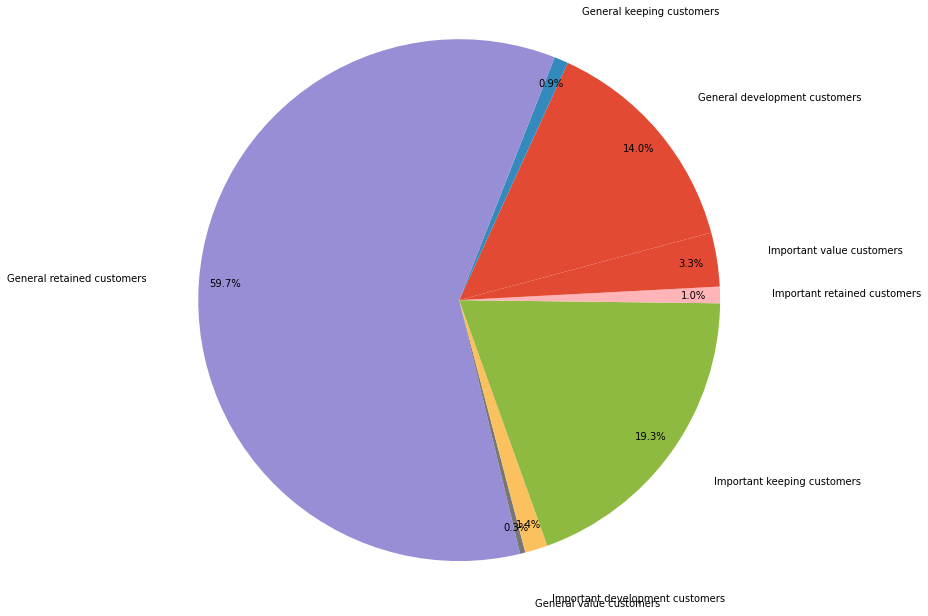

In [69]:
use_c = rfm.groupby('label').count()
plt.axis('equal')
labels = ['General development customers','General keeping customers','General retained customers'
          ,'General value customers','Important development customers','Important keeping customers'
          ,'Important retained customers','Important value customers']
plt.pie(use_c['M'],
       autopct='%3.1f%%',
        labels = labels,
        pctdistance=0.9,
       labeldistance = 1.2,
       radius=3,
       startangle = 15)
plt.show()

summary:
The consumption of important keeping customers in the total amount of consumption was much larger than that of other customers. It shows that most of the sales was contributed by important keeping customers.If the company can keep them, the company would gurantee the sales and achieve KPI. 

In [70]:
# 5.Customer's status
# use pivot with aggfunc to calculate the number of purchase products of users monthly
# i can see who bought or not 
pivoted_counts = df.pivot_table(index = 'user_id',
                                  columns = 'month',
                                  values = 'order_dt',
                                  aggfunc = 'count').fillna(0)

pivoted_counts.head()

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


In [71]:
# if the user purchases, label 1 else 0.
df_purchase = pivoted_counts.applymap(lambda x: 1 if x > 0 else 0)
df_purchase.head()

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0


difinition a function to divide the customer's status into five :
unreg,new,active,return and unactive

There are two situations:
1. If customer did not purchase this month:
  - marker unreg if the customer unregistered
  - marker unactive if the customer purchased
  - marker unreg in other cases

2. If customer purchased this month:
  - marker new if the customer purchased in the first time or the customer unregistered last month
  - marker return if the customer did not purchase last month
  - marker active in other cases



In [77]:
#customer's status

def active_status(data):
    status = []
    for i in range(18):# there are 18 months
        
        # If customer did not purchase this month
        if data[i] == 0:
            if len(status) > 0:
                if status[i-1] == 'unreg':
                    status.append('unreg')
                else:
                    status.append('inactive')
            else:
                status.append('unreg')                  
        
        # If customer purchased this month
        else:
            if len(status) == 0:
                status.append('new')
            else:
                if status[i-1] == 'inactive':
                    status.append('return')
                elif status[i-1] == 'unreg':
                    status.append('new')
                else:
                    status.append('active')
    
    return pd.Series(status, index = pivoted_counts.columns)
# convert list to series

In [78]:
purchase_stats = df_purchase.apply(active_status,axis=1)
purchase_stats.head()

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,new,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive
2,new,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive
3,new,inactive,return,active,inactive,inactive,inactive,inactive,inactive,inactive,return,inactive,inactive,inactive,inactive,inactive,return,inactive
4,new,inactive,inactive,inactive,inactive,inactive,inactive,return,inactive,inactive,inactive,return,inactive,inactive,inactive,inactive,inactive,inactive
5,new,active,inactive,return,active,active,active,inactive,return,inactive,inactive,return,active,inactive,inactive,inactive,inactive,inactive


In [85]:
# set the unreg to Nan in order to count more easierly
purchase_stats_ct = purchase_stats.replace('unreg',np.NaN).apply(lambda x : pd.value_counts(x))
purchase_stats_ct

# it had 7846 new customers on January. 7846 customers divide the 1157 active customers and 6689 unactive customers.
# it showed the churn and unactive customers ware increasing and return was decreasing.

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
active,NaN,1157.0,1681,1773.0,852.0,747.0,746.0,604.0,528.0,532.0,624.0,632.0,512.0,472.0,571.0,518.0,459.0,446.0
inactive,NaN,6689.0,14046,20748.0,21356.0,21231.0,21390.0,21798.0,21831.0,21731.0,21542.0,21706.0,22033.0,22019.0,21510.0,22133.0,22082.0,22064.0
new,7846.0,8476.0,7248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
return,NaN,NaN,595,1049.0,1362.0,1592.0,1434.0,1168.0,1211.0,1307.0,1404.0,1232.0,1025.0,1079.0,1489.0,919.0,1029.0,1060.0


In [86]:
# fill the Nan as 0 in order to count 
purchase_stats_ct.fillna(0).head()

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
active,0.0,1157.0,1681,1773.0,852.0,747.0,746.0,604.0,528.0,532.0,624.0,632.0,512.0,472.0,571.0,518.0,459.0,446.0
inactive,0.0,6689.0,14046,20748.0,21356.0,21231.0,21390.0,21798.0,21831.0,21731.0,21542.0,21706.0,22033.0,22019.0,21510.0,22133.0,22082.0,22064.0
new,7846.0,8476.0,7248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
return,0.0,0.0,595,1049.0,1362.0,1592.0,1434.0,1168.0,1211.0,1307.0,1404.0,1232.0,1025.0,1079.0,1489.0,919.0,1029.0,1060.0


<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/pyplot.py'>

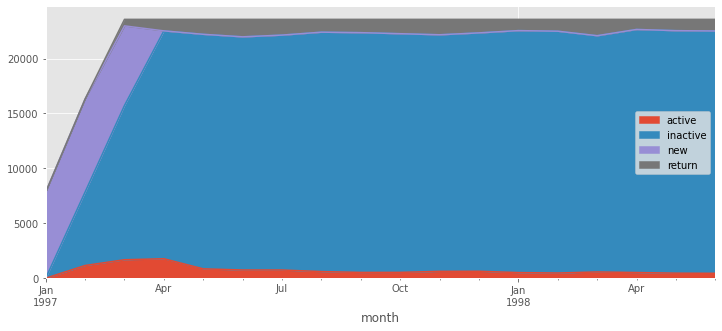

In [96]:
purchase_stats_ct=purchase_status_ct.fillna(0).T
purchase_stats_ct.plot.area(figsize=(12,5))
plt

# Part 5  Recommendations

1.For the Important value customers:
Reward them. We can show that we really appreciate them and cherish them.Customers are people and people love to feel appreciated. We can give them surprise gifts(cinema tickets, concert tickets) and discounts to encourage them to purchase more products.

2.For important keeping customers: 
Offer membership or loyalty programs to encourage them repeated purchase and convert them to important value customers.

3.For important retained customers and important development customers:
Offer membership or loyalty programs and avoid losing them to comptitors.

4.For the unactive and new customers:
(1)We can adopt different strategies such as promotion, recall and customer division. Except for these measures mentionned above, as for e-commerce store, we suggest that it can optimize the website and redesign the new page by A/B testing to attract customers. 

(2)Simplify purchasing process. 'Firstly purchase, last register'. At the same time, it needs to improve services such as logistics service and reduce the delivery time. Good communications with customers to learn their habits and build up good reputation.

